## EDA Contraceptive Method Choice

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pandas_profiling

### Read file description

In [2]:
FP = open('cmc.names', 'r')
for line in FP:
    print(line)

1. Title: Contraceptive Method Choice



2. Sources:

   (a) Origin:  This dataset is a subset of the 1987 National Indonesia

                Contraceptive Prevalence Survey

   (b) Creator: Tjen-Sien Lim (limt@stat.wisc.edu)

   (c) Donor:   Tjen-Sien Lim (limt@stat.wisc.edu)

   (c) Date:    June 7, 1997



3. Past Usage:

   Lim, T.-S., Loh, W.-Y. & Shih, Y.-S. (1999). A Comparison of

   Prediction Accuracy, Complexity, and Training Time of Thirty-three

   Old and New Classification Algorithms. Machine Learning. Forthcoming.

   (ftp://ftp.stat.wisc.edu/pub/loh/treeprogs/quest1.7/mach1317.pdf or

   (http://www.stat.wisc.edu/~limt/mach1317.pdf)



4. Relevant Information:

   This dataset is a subset of the 1987 National Indonesia Contraceptive

   Prevalence Survey. The samples are married women who were either not 

   pregnant or do not know if they were at the time of interview. The 

   problem is to predict the current contraceptive method choice 

   (no use, long-term met

### Read the data

In [3]:
FP = open('cmc.data', 'r')
for line in FP:
    print(line)

24,2,3,3,1,1,2,3,0,1

45,1,3,10,1,1,3,4,0,1

43,2,3,7,1,1,3,4,0,1

42,3,2,9,1,1,3,3,0,1

36,3,3,8,1,1,3,2,0,1

19,4,4,0,1,1,3,3,0,1

38,2,3,6,1,1,3,2,0,1

21,3,3,1,1,0,3,2,0,1

27,2,3,3,1,1,3,4,0,1

45,1,1,8,1,1,2,2,1,1

38,1,3,2,1,0,3,3,1,1

42,1,4,4,1,1,1,3,0,1

44,4,4,1,1,0,1,4,0,1

42,2,4,1,1,0,3,3,0,1

38,3,4,2,1,1,2,3,0,1

26,2,4,0,1,1,4,1,0,1

48,1,1,7,1,1,2,4,0,1

39,2,2,6,1,1,2,4,0,1

37,2,2,8,1,1,2,3,0,1

39,2,1,5,1,1,2,1,1,1

26,3,4,1,1,0,4,1,0,1

24,3,4,0,1,0,3,1,0,1

46,4,4,1,0,1,1,4,0,1

39,4,4,1,1,1,1,4,0,1

48,4,4,5,1,1,1,4,0,1

40,2,4,8,1,1,3,3,0,1

38,4,4,1,1,0,1,4,0,1

29,4,4,0,1,0,1,4,0,1

24,4,4,0,1,0,2,2,0,1

43,1,2,8,1,1,2,4,0,1

31,3,4,2,1,1,1,4,0,1

31,4,4,2,1,1,3,2,0,1

26,2,4,0,1,0,1,2,0,1

33,2,2,2,1,1,3,1,0,1

24,2,3,1,1,1,3,3,0,1

42,1,3,9,1,1,3,2,1,1

43,1,2,8,1,0,3,1,0,1

25,3,3,4,1,1,3,2,0,1

42,2,2,3,1,1,3,4,0,1

28,2,2,1,1,1,2,4,0,1

28,1,1,3,1,1,3,1,0,1

47,2,3,0,1,0,1,3,0,1

48,2,4,2,1,1,1,3,0,1

40,4,4,2,0,1,1,4,0,1

28,2,2,1,1,1,3,2,0,1

25,1,4,1,

37,3,4,4,0,1,2,4,0,3

35,4,4,3,0,1,3,4,0,3

29,2,3,4,1,1,3,2,0,3

28,4,4,2,0,1,2,4,0,3

46,4,4,4,0,1,1,4,0,3

34,4,3,3,0,1,2,4,0,3

43,3,3,2,0,0,3,4,0,3

28,4,4,3,0,0,3,4,0,3

28,3,3,3,1,0,2,4,0,3

34,4,4,6,1,1,2,2,0,3

27,2,4,4,1,1,3,4,0,3

36,1,3,6,1,1,3,2,0,3

17,2,2,0,1,0,3,2,0,3

21,3,3,1,1,1,3,2,0,3

25,2,2,1,1,1,3,1,0,3

23,2,3,2,1,0,3,2,0,3

25,2,2,1,1,1,3,3,0,3

35,1,2,4,1,0,4,4,0,3

32,3,4,4,1,1,3,2,0,3

37,2,3,5,1,1,4,2,0,3

31,3,4,4,1,0,3,3,0,3

25,3,4,3,1,1,3,4,0,3

26,3,4,4,1,1,2,4,0,3

39,1,2,2,1,0,2,4,0,3

21,3,3,2,1,1,2,3,0,3

35,3,2,9,1,0,3,4,0,3

20,2,2,1,1,1,3,2,0,3

40,2,3,5,1,1,3,3,0,3

41,3,3,7,0,1,2,4,0,3

36,2,4,8,1,1,1,4,0,3

40,2,4,3,0,1,3,4,0,3

32,4,4,3,1,0,1,4,0,3

24,3,4,4,1,1,2,3,0,3

20,3,4,1,0,1,2,4,0,3

32,4,4,4,1,0,1,4,0,3

22,2,2,3,1,0,3,3,0,3

30,3,3,4,1,0,2,2,0,3

31,4,4,3,1,0,1,4,0,3

35,3,4,5,1,1,1,4,0,3

38,4,4,2,1,1,3,4,0,3

31,4,4,1,1,1,1,4,0,3

25,4,4,2,1,1,2,4,0,3

30,4,4,2,1,1,1,4,0,3

22,1,2,2,1,1,3,4,0,3

31,4,4,3,1,1,1,4,0,3

29,4,4,3,1


32,2,4,5,1,1,3,4,0,3

27,4,4,2,0,0,2,4,0,3

26,4,4,1,0,0,2,4,0,3

42,4,4,5,0,1,2,4,0,3

24,4,4,1,1,1,1,3,0,3

37,4,4,6,1,1,1,4,0,3

30,2,3,5,1,0,3,4,0,3

27,4,4,1,1,1,1,4,0,3

34,2,4,6,1,1,3,3,0,3

32,3,4,5,0,1,1,4,0,3

28,4,4,1,0,0,2,4,0,3

29,3,3,1,0,0,2,4,0,3

42,4,4,3,0,1,2,4,0,3

21,2,2,0,0,1,4,4,0,3

22,4,4,2,1,1,3,4,0,3

36,4,4,3,0,1,3,4,0,3

45,2,3,3,0,0,2,4,0,3

34,4,4,2,0,0,2,4,0,3

35,2,3,5,1,1,3,3,0,3

19,4,4,1,1,1,2,3,0,3

27,4,4,4,1,1,3,3,0,3

37,2,4,4,1,0,2,3,0,3

26,3,2,4,1,1,3,4,0,3

28,1,3,5,1,1,3,4,0,3

31,3,4,5,1,1,1,4,0,3

32,2,2,6,1,1,2,3,0,3

40,2,2,4,0,0,2,4,0,3

27,3,3,5,1,1,2,4,0,3

27,2,2,3,1,1,2,2,1,3

37,4,4,5,0,0,2,4,0,3

22,4,3,1,1,1,2,2,0,3

27,4,4,4,1,1,1,2,1,3

21,4,4,1,0,1,2,4,0,3

30,1,3,2,1,1,3,4,0,3

23,2,2,1,1,1,2,4,0,3

25,2,4,3,1,1,1,3,0,3

42,2,4,6,1,1,2,4,0,3

29,4,4,3,1,1,1,4,0,3

33,4,4,2,1,0,2,4,0,3

33,4,4,3,1,1,1,4,0,3

39,3,3,8,1,0,1,4,0,3

33,3,3,4,1,0,2,2,0,3

17,3,3,1,1,1,2,4,0,3



### Dataframe

In [4]:
cols=['wife_age','wife_education','husband_education','children','wife_religion','wife_working','husband_occupation','SOL','media_exposure','contraceptive_method']
cmc = pd.read_csv('cmc.data', sep=',', names=cols)
cmc_int = cmc

In [5]:
cmc.head()

wife_age  wife_education  husband_education  children  wife_religion  \
0        24               2                  3         3              1   
1        45               1                  3        10              1   
2        43               2                  3         7              1   
3        42               3                  2         9              1   
4        36               3                  3         8              1   

   wife_working  husband_occupation  SOL  media_exposure  contraceptive_method  
0             1                   2    3               0                     1  
1             1                   3    4               0                     1  
2             1                   3    4               0                     1  
3             1                   3    3               0                     1  
4             1                   3    2               0                     1

In [6]:
cmc.dtypes

wife_age                int64
wife_education          int64
husband_education       int64
children                int64
wife_religion           int64
wife_working            int64
husband_occupation      int64
SOL                     int64
media_exposure          int64
contraceptive_method    int64
dtype: object

### Column values transformation using Lambda functions 

In [7]:
# python lambda functions
religion_function = lambda x: ['non-Islam','islam'][x]
contraceptive_method_fun = lambda x: ['no-use','long-term','short-term'][x-1]
wife_working_fun = lambda x: ['yes','no'][x]
media_exposure_fun = lambda x: ['good','not-good'][x]
hus_ocupation_fun = lambda x: str(x)
sol_fun = lambda x: ["low", "mid_low", "mid_high", "high"][x-1]
hus_edu_fun = lambda x: ["low", "mid_low", "mid_high", "high"][x-1]
wife_edu_fun = lambda x: ["low", "mid_low", "mid_high", "high"][x-1]


In [8]:
#cmc.wife_religion = cmc.wife_religion.apply(religion_function)

cmc.contraceptive_method = cmc.contraceptive_method.apply(contraceptive_method_fun)

#cmc.wife_working = cmc.wife_working.apply(wife_working_fun)

#cmc.media_exposure = cmc.media_exposure.apply(media_exposure_fun)

#cmc.husband_occupation = cmc.husband_occupation.apply(hus_ocupation_fun)

#cmc.husband_education = cmc.husband_education.apply(hus_edu_fun)

#cmc.wife_education = cmc.wife_education.apply(wife_edu_fun)

#cmc.SOL = cmc.SOL.apply(sol_fun)

cmc.head()

wife_age  wife_education  husband_education  children  wife_religion  \
0        24               2                  3         3              1   
1        45               1                  3        10              1   
2        43               2                  3         7              1   
3        42               3                  2         9              1   
4        36               3                  3         8              1   

   wife_working  husband_occupation  SOL  media_exposure contraceptive_method  
0             1                   2    3               0               no-use  
1             1                   3    4               0               no-use  
2             1                   3    4               0               no-use  
3             1                   3    3               0               no-use  
4             1                   3    2               0               no-use

In [9]:
cmc.dtypes

wife_age                 int64
wife_education           int64
husband_education        int64
children                 int64
wife_religion            int64
wife_working             int64
husband_occupation       int64
SOL                      int64
media_exposure           int64
contraceptive_method    object
dtype: object

## Univariate Analysis

In [10]:
cmc.shape

(1473, 10)

In [11]:
# Data Characteristics
cmc.describe().T

count       mean       std   min   25%   50%   75%   max
wife_age            1473.0  32.538357  8.227245  16.0  26.0  32.0  39.0  49.0
wife_education      1473.0   2.958588  1.014994   1.0   2.0   3.0   4.0   4.0
husband_education   1473.0   3.429735  0.816349   1.0   3.0   4.0   4.0   4.0
children            1473.0   3.261371  2.358549   0.0   1.0   3.0   4.0  16.0
wife_religion       1473.0   0.850645  0.356559   0.0   1.0   1.0   1.0   1.0
wife_working        1473.0   0.749491  0.433453   0.0   0.0   1.0   1.0   1.0
husband_occupation  1473.0   2.137814  0.864857   1.0   1.0   2.0   3.0   4.0
SOL                 1473.0   3.133741  0.976161   1.0   3.0   3.0   4.0   4.0
media_exposure      1473.0   0.073999  0.261858   0.0   0.0   0.0   0.0   1.0

In [12]:
# Data (Storage) Type
cmc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
wife_age                1473 non-null int64
wife_education          1473 non-null int64
husband_education       1473 non-null int64
children                1473 non-null int64
wife_religion           1473 non-null int64
wife_working            1473 non-null int64
husband_occupation      1473 non-null int64
SOL                     1473 non-null int64
media_exposure          1473 non-null int64
contraceptive_method    1473 non-null object
dtypes: int64(9), object(1)
memory usage: 115.2+ KB


In [13]:
# Null values
cmc.isnull().sum()

wife_age                0
wife_education          0
husband_education       0
children                0
wife_religion           0
wife_working            0
husband_occupation      0
SOL                     0
media_exposure          0
contraceptive_method    0
dtype: int64

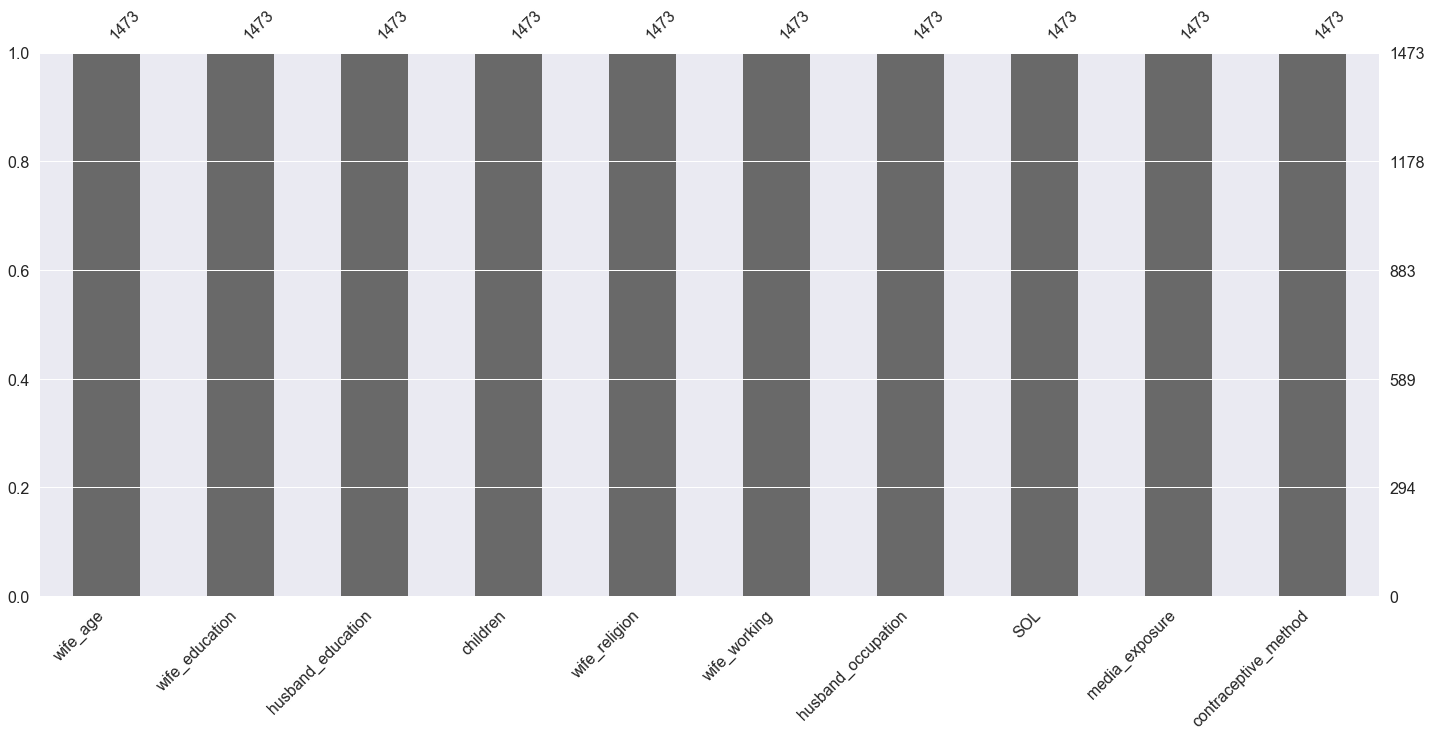

In [14]:
import missingno as msno
msno.bar(cmc, labels=True)

### Variable balance

In [15]:
# Variable Balance
cmc.contraceptive_method.value_counts()

no-use        629
short-term    511
long-term     333
Name: contraceptive_method, dtype: int64

In [16]:
import plotly.graph_objects as go

In [17]:
labels=['Sample']

fig = go.Figure(go.Bar(x=labels, y=[629], name='no use'))
fig.add_trace(go.Bar(x=labels, y=[511], name='short use'))
fig.add_trace(go.Bar(x=labels, y=[333], name='long use'))

# Change the bar mode
fig.update_layout(title_text='Stacked bar 1. Contraceptive method used', barmode='stack')
fig.show()

In [18]:
outputfp='contraceptive_method_used.png'

plt.savefig(outputfp, dpi=600)

print(outputfp)

contraceptive_method_used.png


<Figure size 432x288 with 0 Axes>

In [19]:
cmc.wife_religion.value_counts()

1    1253
0     220
Name: wife_religion, dtype: int64

In [20]:
labels=['Sample']

fig = go.Figure(go.Bar(x=labels, y=[1253], name='Islam'))
fig.add_trace(go.Bar(x=labels, y=[220], name='Non-islam'))

# Change the bar mode
fig.update_layout(title_text="Stacked bar 2. Wife's religion", barmode='stack')
fig.show()

outputfp='wife_religion.png'

plt.savefig(outputfp, dpi=600)

print(outputfp)

wife_religion.png


<Figure size 432x288 with 0 Axes>

In [21]:
cmc.media_exposure.value_counts()

0    1364
1     109
Name: media_exposure, dtype: int64

In [22]:
cmc.wife_working.value_counts()

1    1104
0     369
Name: wife_working, dtype: int64

### Histogram

<Figure size 432x288 with 0 Axes>

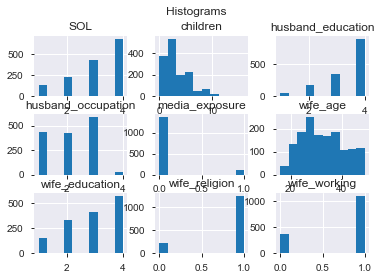

In [23]:
plt.figure()
cmc_int.hist()
plt.suptitle("Histograms")
plt.show()

wife_age_distribution.png


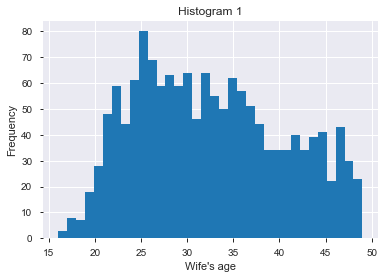

In [24]:
cmc.wife_age.hist(bins=34)
plt.title('Histogram 1')
plt.xlabel("Wife's age")
plt.ylabel('Frequency')
outputfp='wife_age_distribution.png'

plt.savefig(outputfp, dpi=600)

print(outputfp)

In [25]:
age=pd.DataFrame(cmc['wife_age'])
print(age.apply(scipy.stats.skew))
print(age.apply(scipy.stats.kurtosis))

wife_age    0.256188
dtype: float64
wife_age   -0.944764
dtype: float64


children_distribution.png


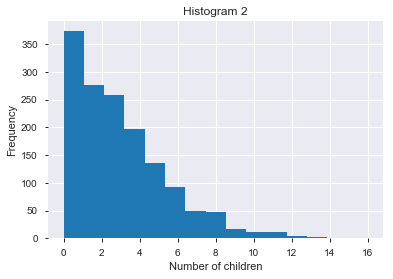

In [26]:
cmc.children.hist(bins=15)
plt.title("Histogram 2")
plt.xlabel("Number of children")
plt.ylabel('Frequency')
outputfp='children_distribution.png'

plt.savefig(outputfp, dpi=600)

print(outputfp)

In [27]:
children=pd.DataFrame(cmc['children'])
print(children.apply(scipy.stats.skew))
print(children.apply(scipy.stats.kurtosis))

children    1.097894
dtype: float64
children    1.520349
dtype: float64


### Boxplot

age_boxplot.png


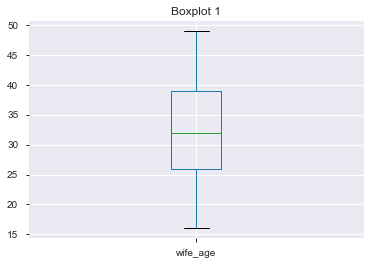

In [28]:
cmc_age=pd.DataFrame(cmc.wife_age)
cmc_age.boxplot()

outputfp='age_boxplot.png'

plt.title("Boxplot 1")

plt.savefig(outputfp, dpi=600)

print(outputfp)

children_boxplot.png


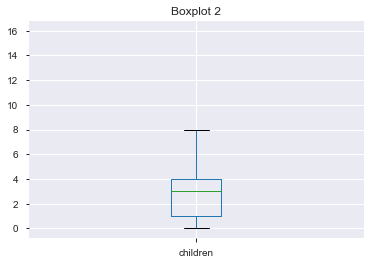

In [29]:
cmc_children=pd.DataFrame(cmc.children)
cmc_children.boxplot()

plt.title("Boxplot 2")

outputfp='children_boxplot.png'

plt.savefig(outputfp, dpi=600)

print(outputfp)

categories_boxplot.png


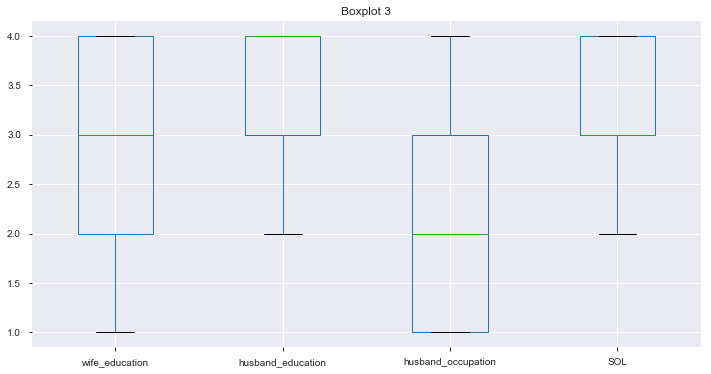

In [30]:
cols=['wife_education','husband_education','husband_occupation','SOL']
cmc_cols=pd.DataFrame(cmc[cols])
cmc_cols.boxplot(figsize=[12,6])
plt.title("Boxplot 3")
outputfp='categories_boxplot.png'

plt.savefig(outputfp, dpi=600)

print(outputfp)

binary_categories_boxplot.png


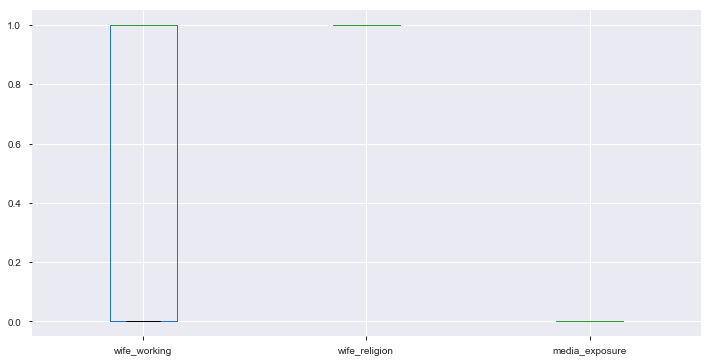

In [31]:
binary=['wife_working', 'wife_religion','media_exposure']

cmc_bin=pd.DataFrame(cmc[binary])
cmc_bin.boxplot(figsize=[12,6])

outputfp='binary_categories_boxplot.png'

plt.savefig(outputfp, dpi=600)

print(outputfp)

In [32]:
# Variable Means
cmc.groupby('contraceptive_method').mean().T

contraceptive_method  long-term     no-use  short-term
wife_age              34.384384  33.424483   30.244618
wife_education         3.456456   2.670906    2.988258
husband_education      3.663664   3.281399    3.459883
children               3.738739   2.934817    3.352250
wife_religion          0.771772   0.880763    0.864971
wife_working           0.732733   0.729730    0.784736
husband_occupation     1.840841   2.200318    2.254403
SOL                    3.468468   2.953895    3.136986
media_exposure         0.030030   0.117647    0.048924

### Bar Charts

In [33]:
columnitas=['wife_education','husband_education','children','wife_religion','wife_working','husband_occupation','SOL','media_exposure','contraceptive_method']

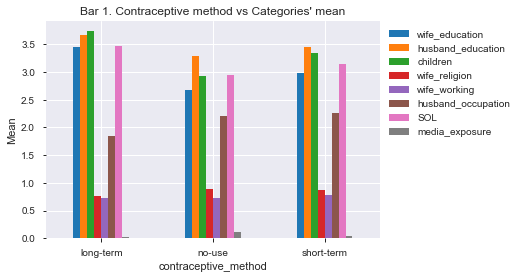

mean_categories_per_method_bar.png


<Figure size 432x288 with 0 Axes>

In [34]:
cmc_int[columnitas].groupby('contraceptive_method').mean().plot(kind='bar')
plt.title("Bar 1. Contraceptive method vs Categories' mean")
plt.ylabel("Mean")
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))

plt.show()

outputfp='mean_categories_per_method_bar.png'

plt.savefig(outputfp, dpi=600)

print(outputfp)

In [35]:
cmc.describe().T

count       mean       std   min   25%   50%   75%   max
wife_age            1473.0  32.538357  8.227245  16.0  26.0  32.0  39.0  49.0
wife_education      1473.0   2.958588  1.014994   1.0   2.0   3.0   4.0   4.0
husband_education   1473.0   3.429735  0.816349   1.0   3.0   4.0   4.0   4.0
children            1473.0   3.261371  2.358549   0.0   1.0   3.0   4.0  16.0
wife_religion       1473.0   0.850645  0.356559   0.0   1.0   1.0   1.0   1.0
wife_working        1473.0   0.749491  0.433453   0.0   0.0   1.0   1.0   1.0
husband_occupation  1473.0   2.137814  0.864857   1.0   1.0   2.0   3.0   4.0
SOL                 1473.0   3.133741  0.976161   1.0   3.0   3.0   4.0   4.0
media_exposure      1473.0   0.073999  0.261858   0.0   0.0   0.0   0.0   1.0

### Crosstab (%)

In [36]:
wife_education=pd.crosstab(cmc.wife_education, cmc.contraceptive_method, normalize='index')
wife_education

contraceptive_method  long-term    no-use  short-term
wife_education                                       
1                      0.059211  0.677632    0.263158
2                      0.110778  0.526946    0.362275
3                      0.195122  0.426829    0.378049
4                      0.358752  0.303293    0.337955

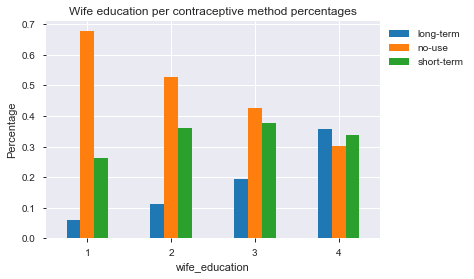

In [37]:
wife_education.plot(kind='bar')
plt.title("Wife education per contraceptive method percentages")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))

In [38]:
husband_education=pd.crosstab(cmc.husband_education, cmc.contraceptive_method, normalize='index')
husband_education

contraceptive_method  long-term    no-use  short-term
husband_education                                    
1                      0.227273  0.704545    0.068182
2                      0.089888  0.556180    0.353933
3                      0.142045  0.457386    0.400568
4                      0.285873  0.375973    0.338154

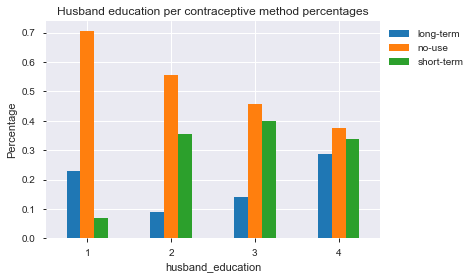

In [39]:
husband_education.plot(kind='bar')
plt.title("Husband education per contraceptive method percentages")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))

In [40]:
wife_religion=pd.crosstab(cmc.wife_religion, cmc.contraceptive_method, normalize='index')
wife_religion

contraceptive_method  long-term    no-use  short-term
wife_religion                                        
0                      0.345455  0.340909    0.313636
1                      0.205108  0.442139    0.352753

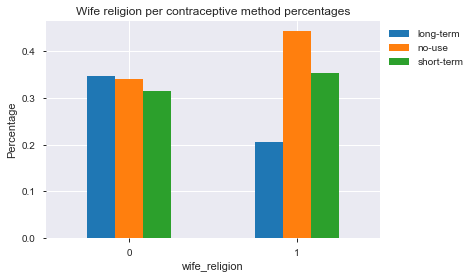

In [41]:
wife_religion.plot(kind='bar')
plt.title("Wife religion per contraceptive method percentages")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))

In [42]:
religion_method_use=pd.crosstab(cmc.wife_religion, cmc.contraceptive_method, normalize='index')
print(religion_method_use)

labels=['Non-Islam', 'Islam']

fig = go.Figure(go.Bar(x=labels, y=religion_method_use['no-use'], name='no use'))
fig.add_trace(go.Bar(x=labels, y=religion_method_use['short-term'], name='short use'))
fig.add_trace(go.Bar(x=labels, y=religion_method_use['long-term'], name='long use'))

# Change the bar mode
fig.update_layout(title_text='Stacked bar 4. Wife religion influence on contraceptive method', barmode='stack')
fig.show()

outputfp='wife_education_influence_per_method.png'

plt.savefig(outputfp, dpi=600)

print(outputfp)

contraceptive_method  long-term    no-use  short-term
wife_religion                                        
0                      0.345455  0.340909    0.313636
1                      0.205108  0.442139    0.352753


wife_education_influence_per_method.png


<Figure size 432x288 with 0 Axes>

In [43]:
wife_working=pd.crosstab(cmc.wife_working, cmc.contraceptive_method, normalize='index')
wife_working

contraceptive_method  long-term    no-use  short-term
wife_working                                         
0                      0.241192  0.460705    0.298103
1                      0.221014  0.415761    0.363225

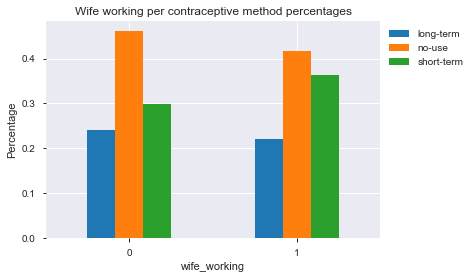

In [44]:
wife_working.plot(kind='bar')
plt.title("Wife working per contraceptive method percentages")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))

In [45]:
media_exposure=pd.crosstab(cmc.media_exposure, cmc.contraceptive_method, normalize='index')
media_exposure

contraceptive_method  long-term    no-use  short-term
media_exposure                                       
0                      0.236804  0.406891    0.356305
1                      0.091743  0.678899    0.229358

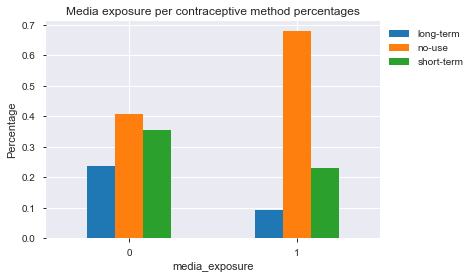

In [46]:
media_exposure.plot(kind='bar')
plt.title("Media exposure per contraceptive method percentages")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))

In [47]:
children=pd.crosstab(cmc.children, cmc.contraceptive_method, normalize='index')
children

contraceptive_method  long-term    no-use  short-term
children                                             
0                      0.000000  0.979381    0.020619
1                      0.166667  0.518116    0.315217
2                      0.202899  0.413043    0.384058
3                      0.270270  0.270270    0.459459
4                      0.314721  0.289340    0.395939
5                      0.266667  0.325926    0.407407
6                      0.293478  0.380435    0.326087
7                      0.387755  0.367347    0.244898
8                      0.191489  0.617021    0.191489
9                      0.187500  0.312500    0.500000
10                     0.181818  0.818182    0.000000
11                     0.181818  0.545455    0.272727
12                     0.000000  1.000000    0.000000
13                     0.500000  0.000000    0.500000
16                     0.000000  0.000000    1.000000

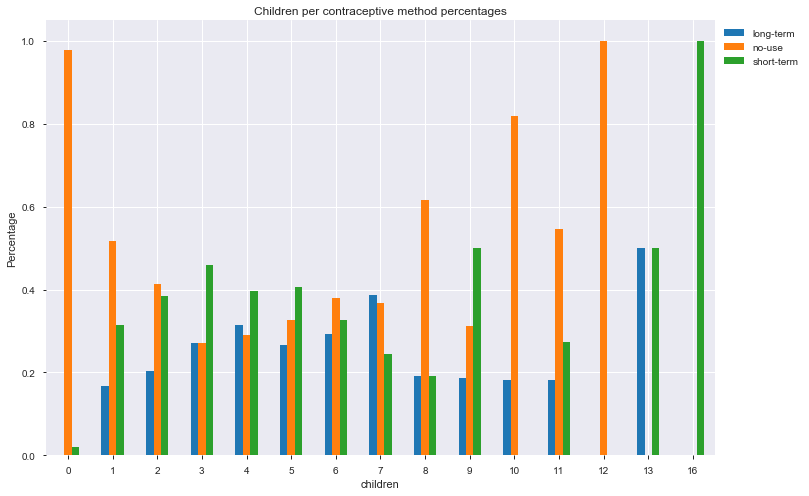

In [48]:
children.plot(kind='bar',figsize = (12,8))

plt.title("Children per contraceptive method percentages")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))

In [49]:
sol=pd.crosstab(cmc.SOL, cmc.contraceptive_method, normalize='index')
sol

contraceptive_method  long-term    no-use  short-term
SOL                                                  
1                      0.069767  0.620155    0.310078
2                      0.131004  0.510917    0.358079
3                      0.208817  0.426914    0.364269
4                      0.298246  0.362573    0.339181

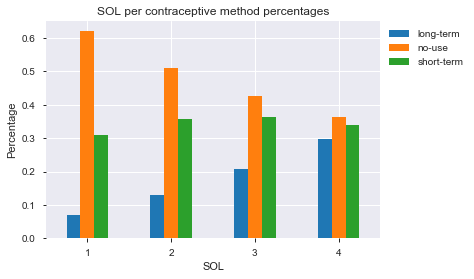

In [50]:
sol.plot(kind='bar')

plt.title("SOL per contraceptive method percentages")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))

### Correlation

In [51]:
correlation_matrix = cmc.corr()

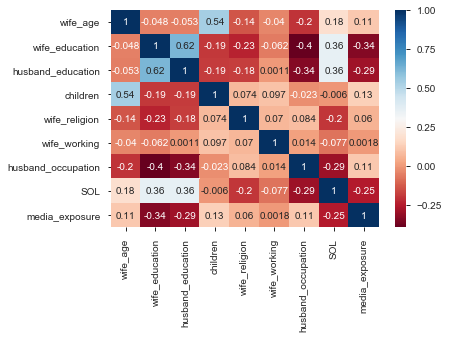

heatmap.png


<Figure size 432x288 with 0 Axes>

In [52]:
# Heatmap
sns.heatmap(correlation_matrix, cmap='RdBu', annot=True)
plt.show()

outputfp='heatmap.png'

plt.savefig(outputfp, dpi=600)

print(outputfp)

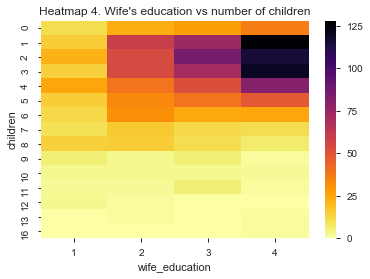

children_vs_education_heatmap.png


<Figure size 432x288 with 0 Axes>

In [53]:
owo=pd.crosstab(cmc.children, cmc.wife_education)
sns.heatmap(owo, cmap='inferno_r')
plt.title("Heatmap 4. Wife's education vs number of children")
plt.show()
outputfp='children_vs_education_heatmap.png'

plt.savefig(outputfp, dpi=600)

print(outputfp)

### Contraceptive use (Yes | No)

In [54]:
cmc['contraceptive_use']=cmc.contraceptive_method
cmc.head()

wife_age  wife_education  husband_education  children  wife_religion  \
0        24               2                  3         3              1   
1        45               1                  3        10              1   
2        43               2                  3         7              1   
3        42               3                  2         9              1   
4        36               3                  3         8              1   

   wife_working  husband_occupation  SOL  media_exposure contraceptive_method  \
0             1                   2    3               0               no-use   
1             1                   3    4               0               no-use   
2             1                   3    4               0               no-use   
3             1                   3    3               0               no-use   
4             1                   3    2               0               no-use   

  contraceptive_use  
0            no-use  
1            no-use  
2            no-use  
3            no-use  
4            no-use

In [55]:
def contraceptive_use_fun(x):
    if x=='no-use':
        return 'no'
    else:
        return 'yes'
cmc['contraceptive_use']=cmc['contraceptive_use'].apply(contraceptive_use_fun)
cmc.head()

wife_age  wife_education  husband_education  children  wife_religion  \
0        24               2                  3         3              1   
1        45               1                  3        10              1   
2        43               2                  3         7              1   
3        42               3                  2         9              1   
4        36               3                  3         8              1   

   wife_working  husband_occupation  SOL  media_exposure contraceptive_method  \
0             1                   2    3               0               no-use   
1             1                   3    4               0               no-use   
2             1                   3    4               0               no-use   
3             1                   3    3               0               no-use   
4             1                   3    2               0               no-use   

  contraceptive_use  
0                no  
1                no  
2                no  
3                no  
4                no

In [56]:
wife_religion_use=pd.crosstab(cmc.wife_religion, cmc.contraceptive_use, normalize='index')
wife_religion_use

contraceptive_use        no       yes
wife_religion                        
0                  0.340909  0.659091
1                  0.442139  0.557861

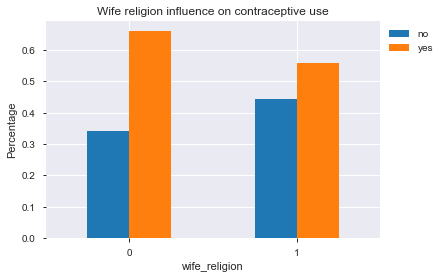

In [57]:
wife_religion_use.plot(kind='bar')

plt.title("Wife religion influence on contraceptive use")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))

In [58]:
labels=['Non-Islam', 'Islam']

fig = go.Figure(data=[
    
    go.Bar(name='No uses', x=labels, y=wife_religion_use.no),
    go.Bar(name='Uses contraceptives', x=labels, y=wife_religion_use.yes)
    
    
])
# Change the bar mode
fig.update_layout(title_text='Stacked bar 3. Wife religion influence on contraceptive use', barmode='stack')
fig.show()

outputfp='wife_religion_influence.png'

plt.savefig(outputfp, dpi=600)

print(outputfp)

wife_religion_influence.png


<Figure size 432x288 with 0 Axes>

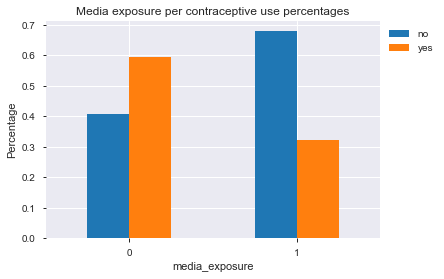

In [59]:
media_exposure_use=pd.crosstab(cmc.media_exposure, cmc.contraceptive_use, normalize='index')

media_exposure_use.plot(kind='bar')

plt.title("Media exposure per contraceptive use percentages")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))

In [60]:
labels=['Good', 'Not good']

fig = go.Figure(data=[
    go.Bar(name='Uses contraceptives', x=labels, y=media_exposure_use.yes),
    go.Bar(name='No uses', x=labels, y=media_exposure_use.no)
])
# Change the bar mode
fig.update_layout(title_text='Stacked bar 8. Media exposure influence on contraceptive use', barmode='stack')
fig.show()

outputfp='media_exposure_infleunce.png'

plt.savefig(outputfp, dpi=600)

print(outputfp)

media_exposure_infleunce.png


<Figure size 432x288 with 0 Axes>

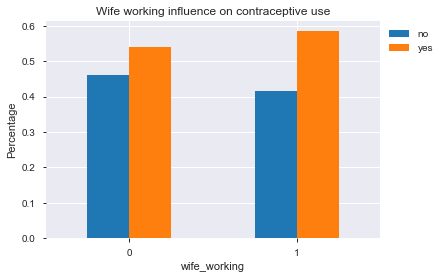

In [61]:
wife_working_use=pd.crosstab(cmc.wife_working, cmc.contraceptive_use, normalize='index')

wife_working_use.plot(kind='bar')

plt.title("Wife working influence on contraceptive use")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))

In [62]:
working=['She does not work', 'She works']

fig = go.Figure(data=[
    go.Bar(name='Uses contraceptives', x=working, y=wife_working_use.yes),
    go.Bar(name='No uses', x=working, y=wife_working_use.no)
])
# Change the bar mode
fig.update_layout(title_text='Wife working influence on contraceptive use', barmode='stack')
fig.show()

In [63]:
education_use=pd.crosstab(cmc.wife_education, cmc.contraceptive_use, normalize='index')
print(education_use)

labels=['low', 'medium low', 'medium-high', 'high']

fig = go.Figure(data=[
    go.Bar(name='No uses', x=labels, y=education_use.no),
    go.Bar(name='Uses contraceptives', x=labels, y=education_use.yes)
])
# Change the bar mode
fig.update_layout(title_text='Stacked bar 6. Wife education influence on contraceptive use', barmode='stack')
fig.show()

outputfp='wife_education_influence.png'

plt.savefig(outputfp, dpi=600)

print(outputfp)

contraceptive_use        no       yes
wife_education                       
1                  0.677632  0.322368
2                  0.526946  0.473054
3                  0.426829  0.573171
4                  0.303293  0.696707


wife_education_influence.png


<Figure size 432x288 with 0 Axes>

In [64]:
education_method_use=pd.crosstab(cmc.wife_education, cmc.contraceptive_method, normalize='index')
print(education_method_use)

labels=['low', 'medium low', 'medium-high', 'high']

fig = go.Figure(go.Bar(x=labels, y=education_method_use['no-use'], name='no use'))
fig.add_trace(go.Bar(x=labels, y=education_method_use['short-term'], name='short use'))
fig.add_trace(go.Bar(x=labels, y=education_method_use['long-term'], name='long use'))

# Change the bar mode
fig.update_layout(title_text='Stacked bar 7. Wife education influence on contraceptive method', barmode='stack')
fig.show()

outputfp='wife_education_influence_per_method.png'

plt.savefig(outputfp, dpi=600)

print(outputfp)

contraceptive_method  long-term    no-use  short-term
wife_education                                       
1                      0.059211  0.677632    0.263158
2                      0.110778  0.526946    0.362275
3                      0.195122  0.426829    0.378049
4                      0.358752  0.303293    0.337955


wife_education_influence_per_method.png


<Figure size 432x288 with 0 Axes>

In [65]:
sol_use=pd.crosstab(cmc.SOL, cmc.contraceptive_use, normalize='index')
print(sol_use)

labels=['low', 'medium low', 'medium-high', 'high']

fig = go.Figure(data=[
    go.Bar(name='No uses', x=labels, y=sol_use.no),
    go.Bar(name='Uses contraceptives', x=labels, y=sol_use.yes)
])
# Change the bar mode
fig.update_layout(title_text='Stacked bar 5. Standard-of-living influence on contraceptive use', barmode='stack')
fig.show()

outputfp='sol_influence.png'

plt.savefig(outputfp, dpi=600)

print(outputfp)

contraceptive_use        no       yes
SOL                                  
1                  0.620155  0.379845
2                  0.510917  0.489083
3                  0.426914  0.573086
4                  0.362573  0.637427


sol_influence.png


<Figure size 432x288 with 0 Axes>

In [66]:
pandas_profiling.ProfileReport(cmc)

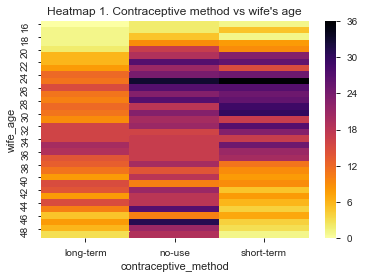

children_vs_education_heatmap.png


<Figure size 432x288 with 0 Axes>

In [67]:
owo=pd.crosstab(cmc.wife_age, cmc.contraceptive_method)
sns.heatmap(owo, cmap='inferno_r')
plt.title("Heatmap 1. Contraceptive method vs wife's age")
plt.show()
outputfp='children_vs_education_heatmap.png'

plt.savefig(outputfp, dpi=600)

print(outputfp)

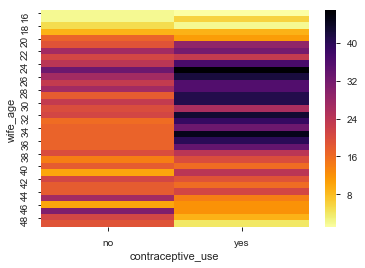

children_vs_education_heatmap.png


<Figure size 432x288 with 0 Axes>

In [68]:
owo=pd.crosstab(cmc.wife_age, cmc.contraceptive_use)
sns.heatmap(owo, cmap='inferno_r')
plt.show()
outputfp='children_vs_education_heatmap.png'

plt.savefig(outputfp, dpi=600)

print(outputfp)

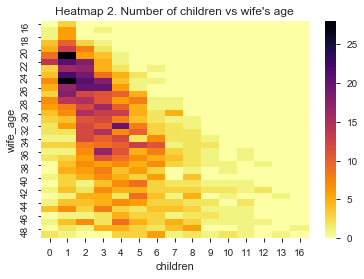

wifeage_vs_children_heatmap.png


<Figure size 432x288 with 0 Axes>

In [69]:
owo=pd.crosstab(cmc.wife_age, cmc.children)
sns.heatmap(owo, cmap='inferno_r')
plt.title("Heatmap 2. Number of children vs wife's age")
plt.show()
outputfp='wifeage_vs_children_heatmap.png'

plt.savefig(outputfp, dpi=600)

print(outputfp)

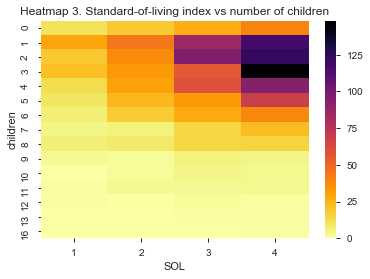

wifeage_vs_children_heatmap.png


<Figure size 432x288 with 0 Axes>

In [70]:
owo=pd.crosstab(cmc.children, cmc.SOL)
sns.heatmap(owo, cmap='inferno_r')
plt.title('Heatmap 3. Standard-of-living index vs number of children')
plt.show()
outputfp='wifeage_vs_children_heatmap.png'

plt.savefig(outputfp, dpi=600)

print(outputfp)

C:\Users\monic\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



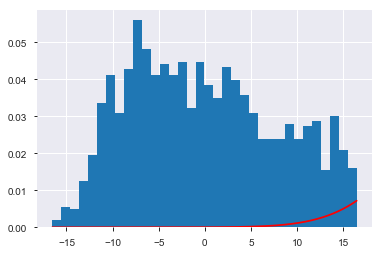

In [71]:
from scipy.stats import norm  
x = cmc.wife_age                                                           

mean = np.mean(x)
sigma = np.std(x)

x -= mean 

x_plot = np.linspace(min(x), max(x), 1000)                                                               

fig = plt.figure()                                                               
ax = fig.add_subplot(1,1,1)                                                      

ax.hist(x, bins=34, normed=True, label="data")
ax.plot(x_plot, norm.pdf(x_plot, mean, sigma), 'r-', label="pdf") 

plt.savefig('normal1.png', dpi=600)

C:\Users\monic\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



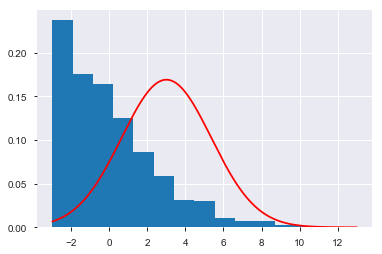

In [72]:
x = cmc.children                                                           

mean = np.median(x)
sigma = np.std(x)

x -= mean 

x_plot = np.linspace(min(x), max(x), 1000)                                                               

fig = plt.figure()                                                               
ax = fig.add_subplot(1,1,1)                                                      
#ax.title("Wife's age normal distribution")
ax.hist(x, bins=15, normed=True, label="data")
ax.plot(x_plot, norm.pdf(x_plot, mean, sigma), 'r-', label="pdf")    
plt.savefig('normal2.png', dpi=600)